<a href="https://colab.research.google.com/github/vjuge/oc-iml/blob/vjuge%2Fissue13/modules/P7/module_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install scalecast

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,10)})

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
!pip install yfinance
!pip install scalecast

In [4]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(30,10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

2022-09-14 16:28:54.400222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 16:28:54.400248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)


[*********************100%***********************]  1 of 1 completed


(2920, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
               '2022-09-13', '2022-09-14'],
              dtype='datetime64[ns]', name='Date', length=2920, freq=None)

'D'

In [6]:
# keep only CLose column
df_btc_usd = df_btc_usd['Close']
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape


(621,)

### Naive Approach

In [9]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-02T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=621
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [10]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

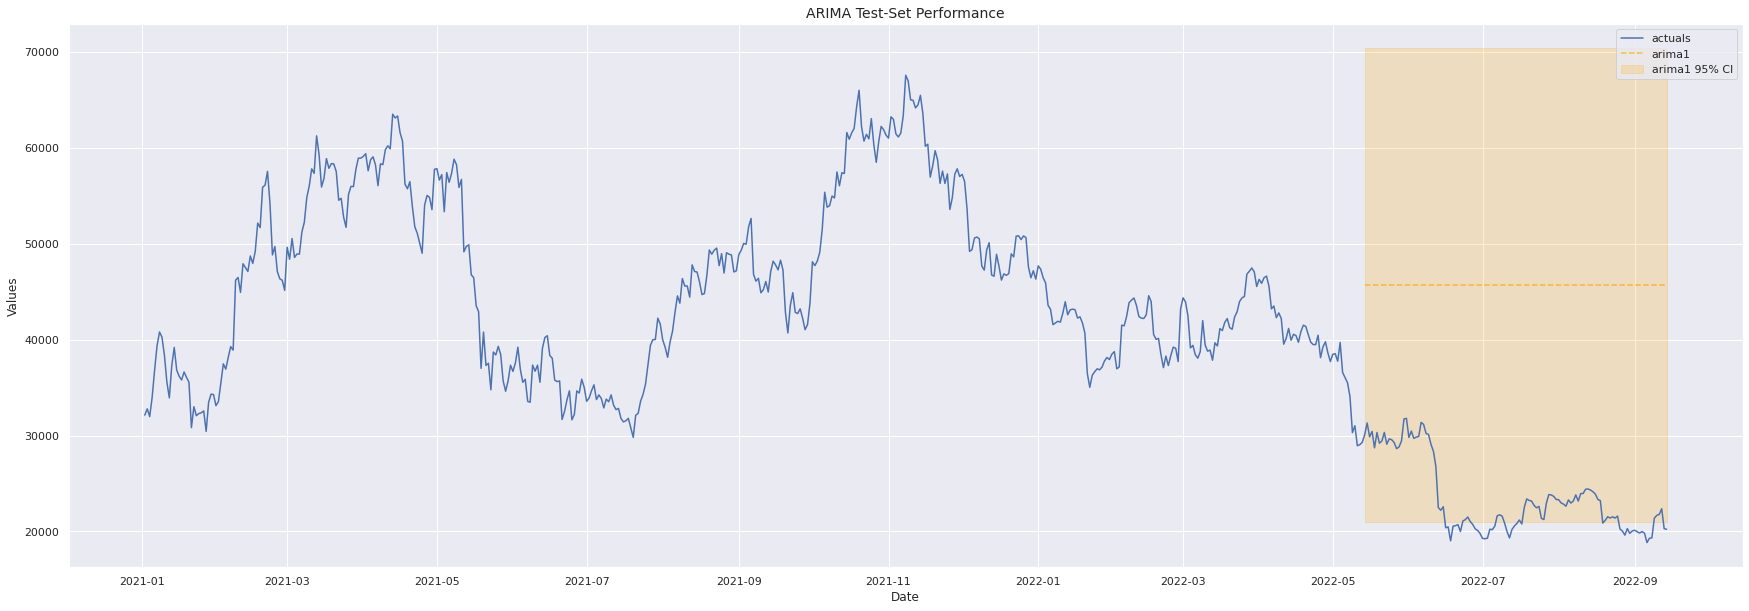

In [11]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

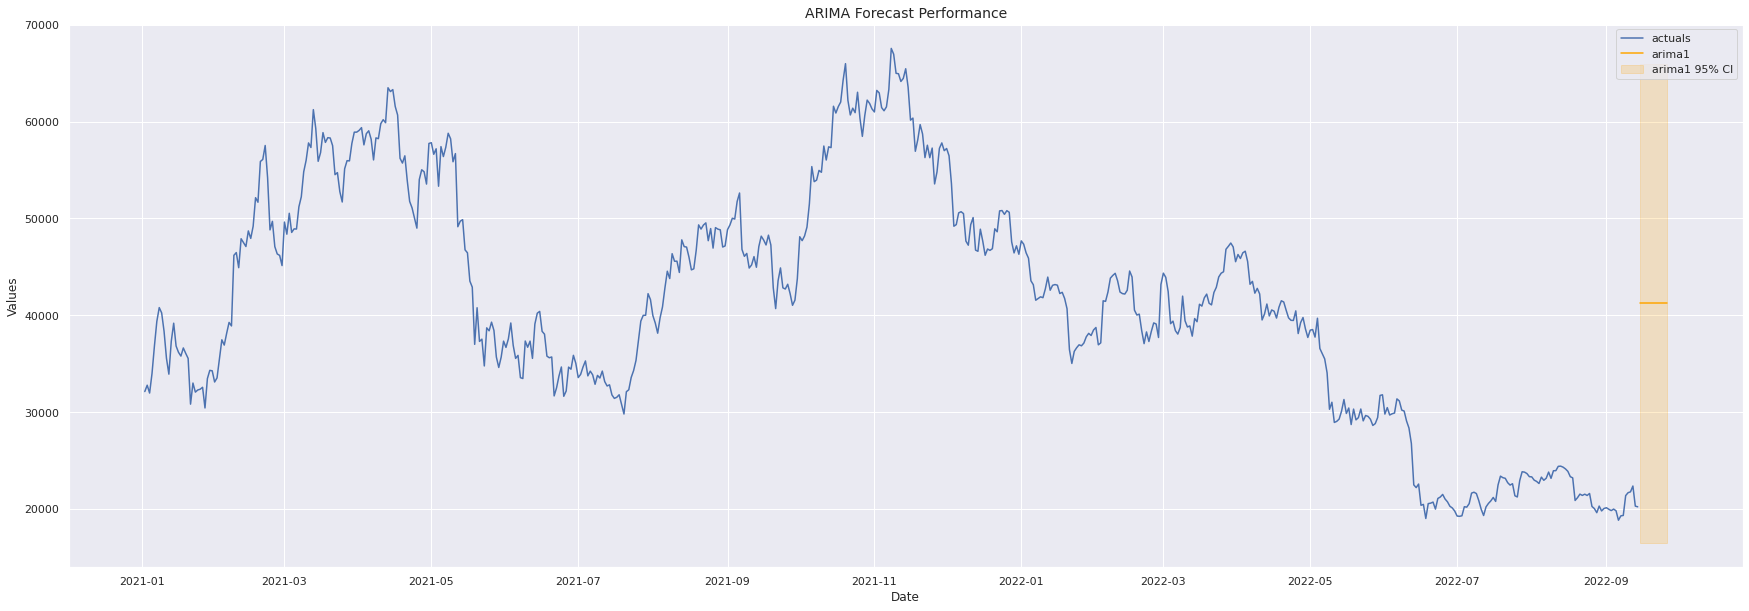

In [12]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

### Human Interpretation - Iterative Approach

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

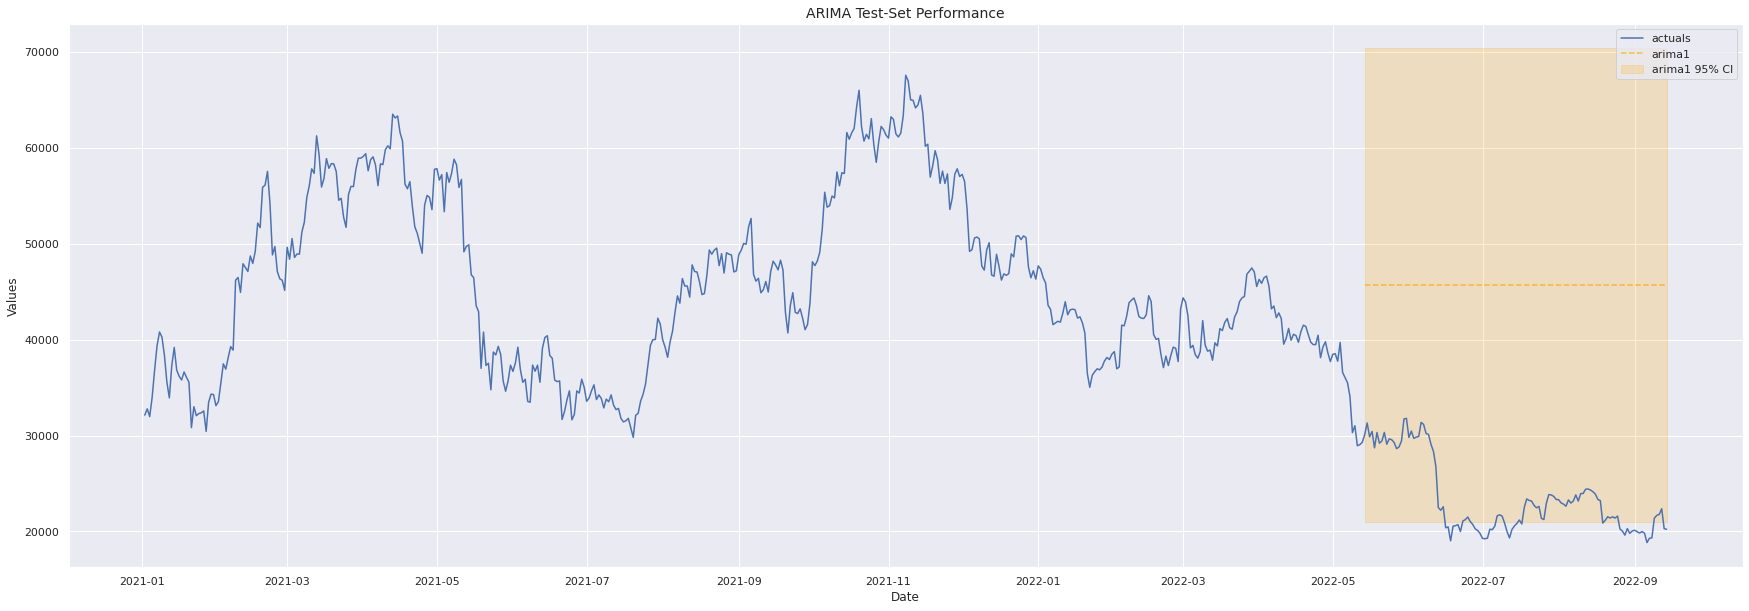

In [13]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

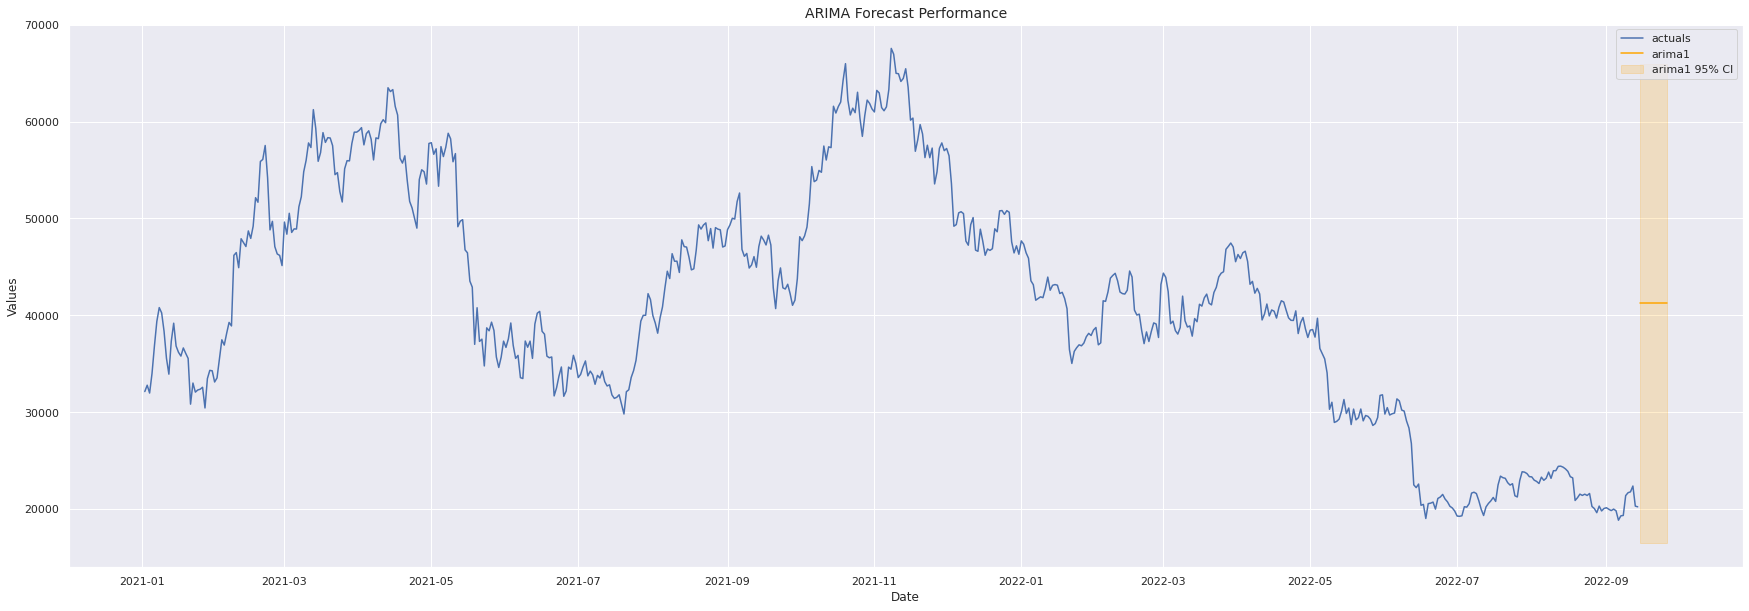

In [14]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

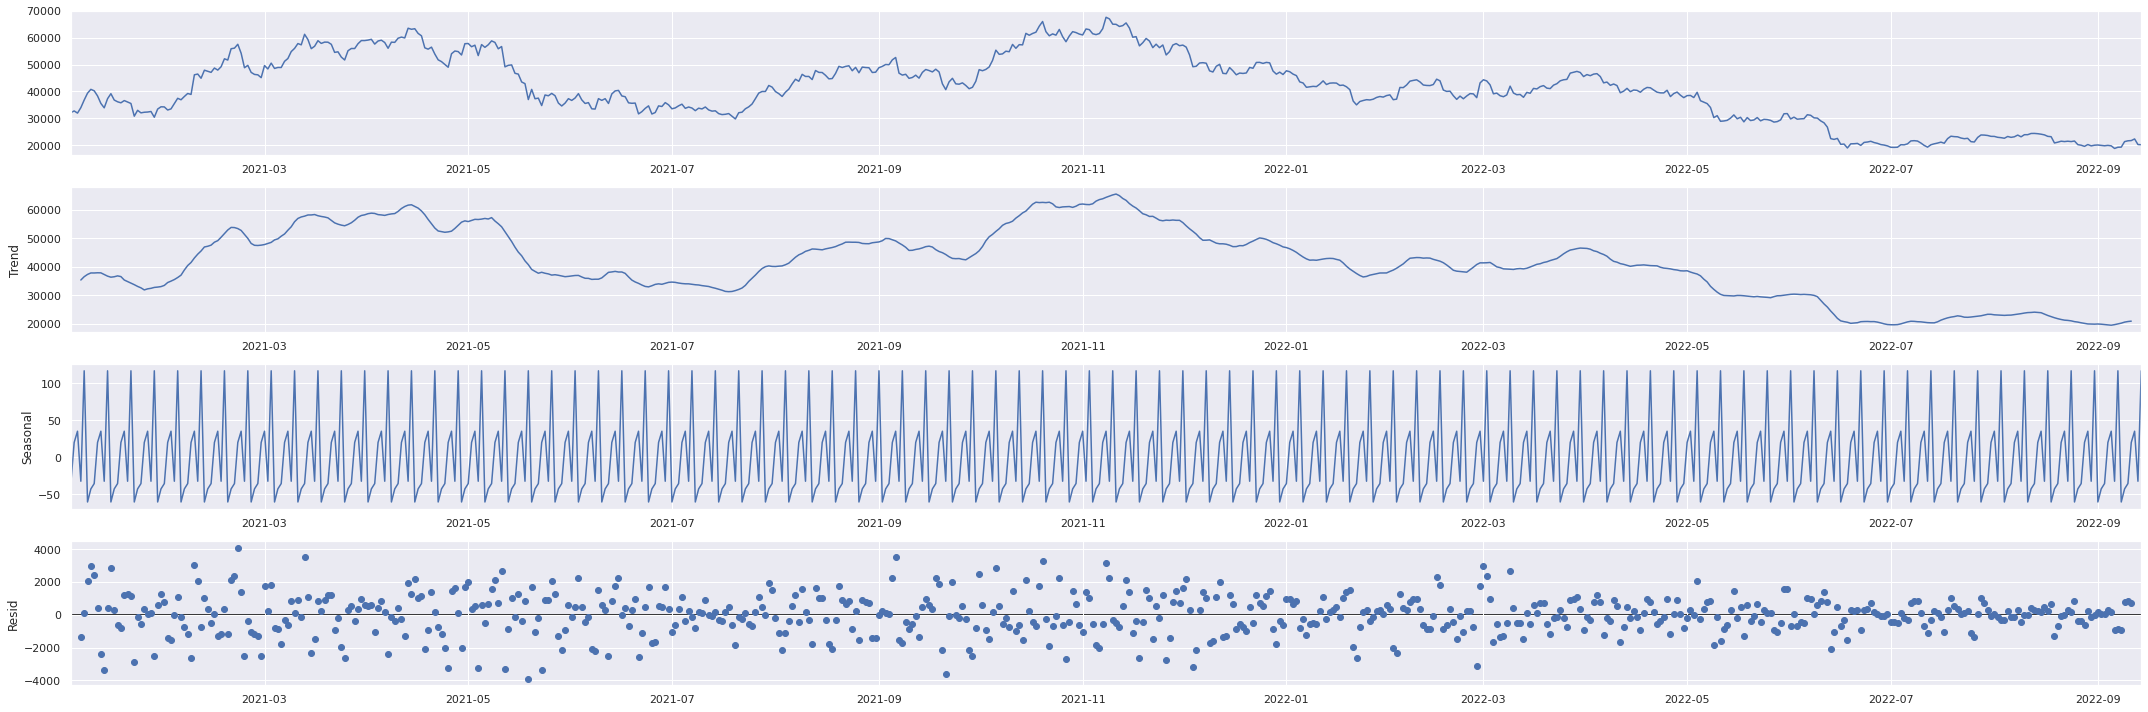

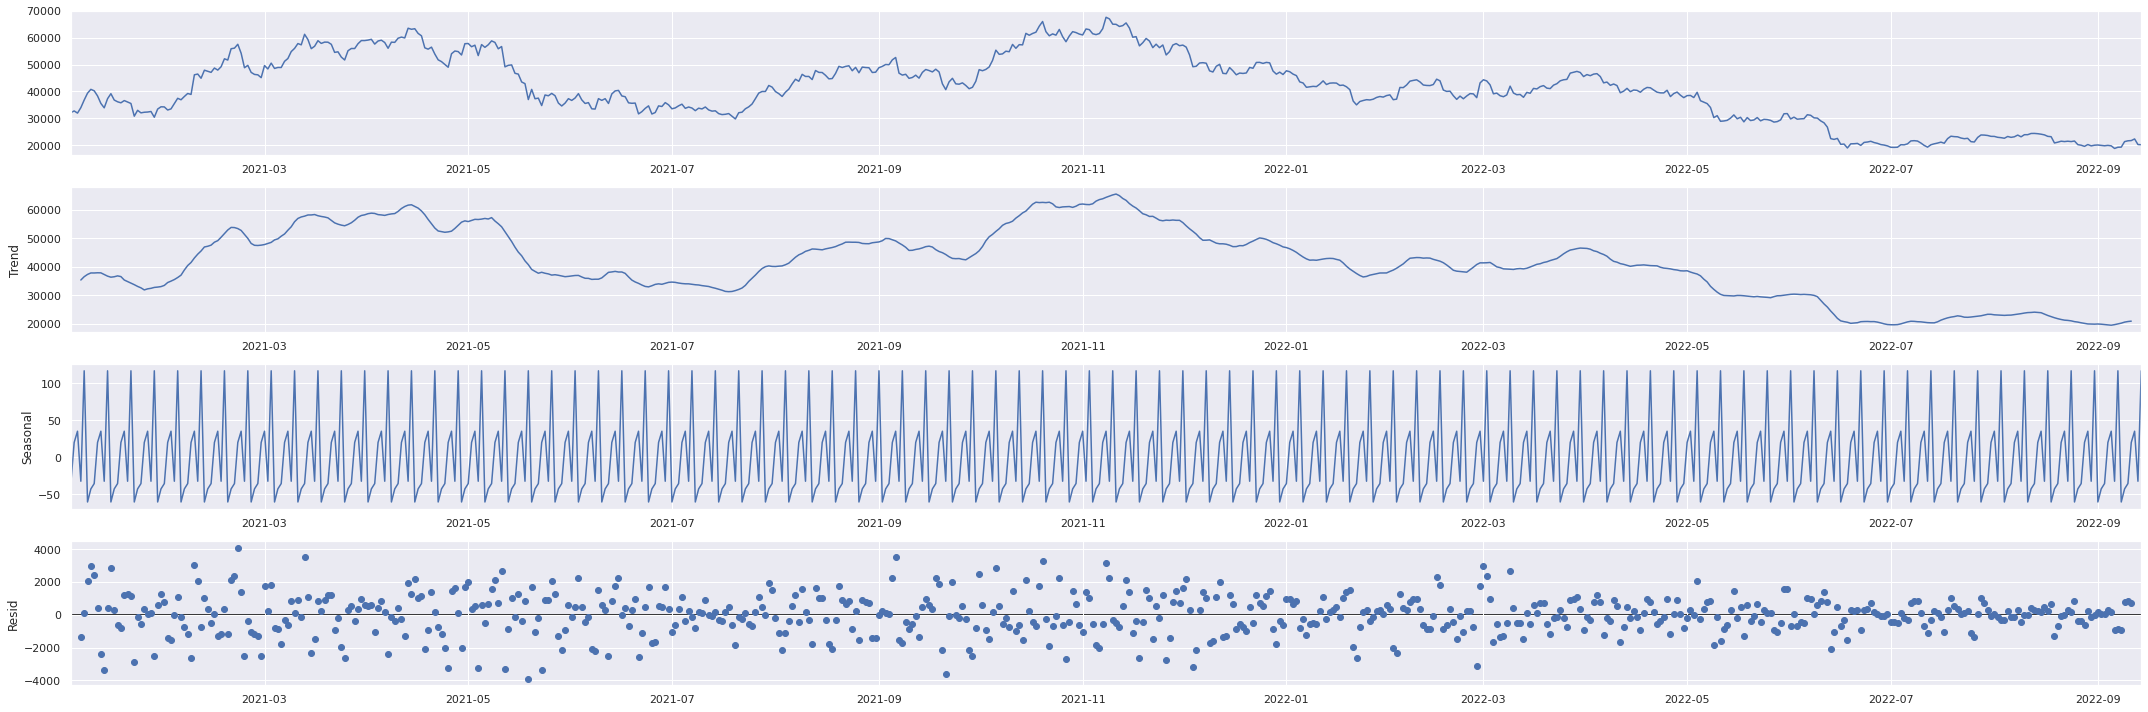

In [15]:
f.seasonal_decompose().plot()
plt.show()

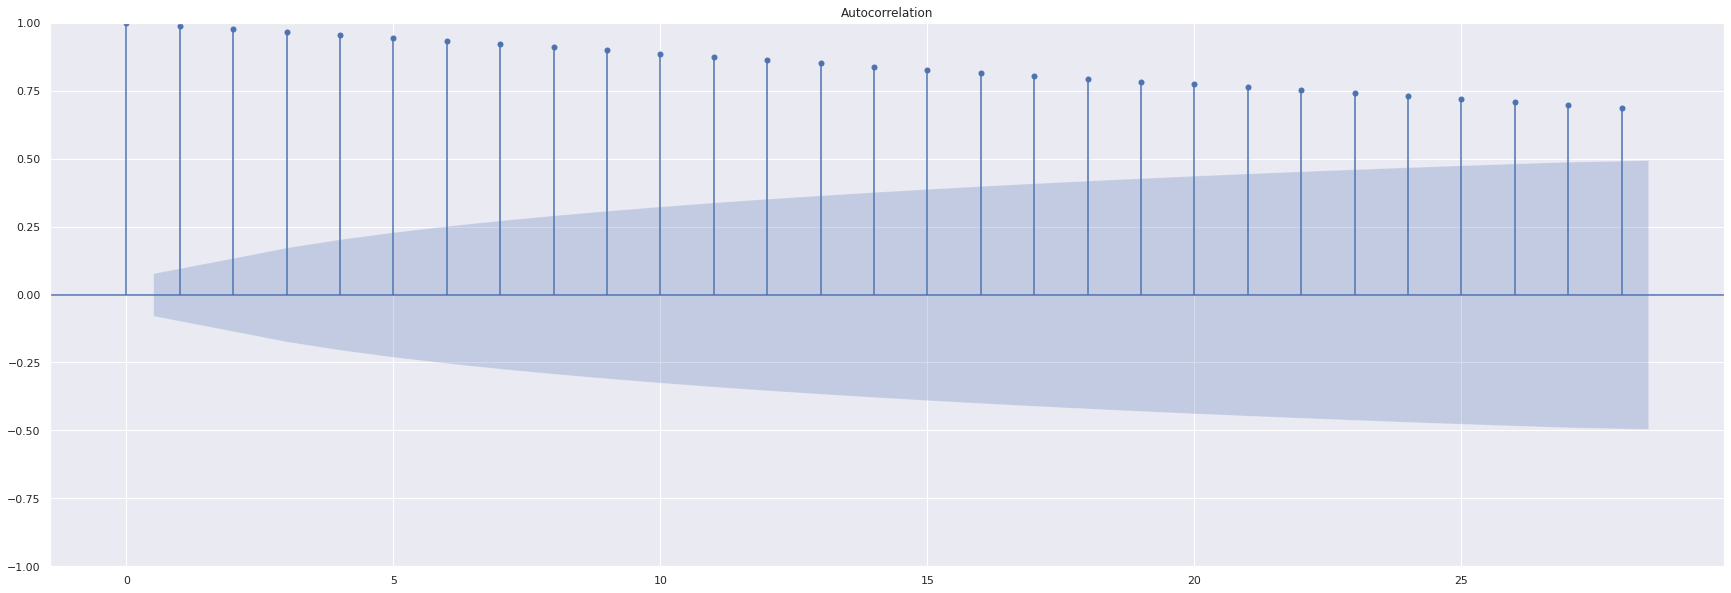

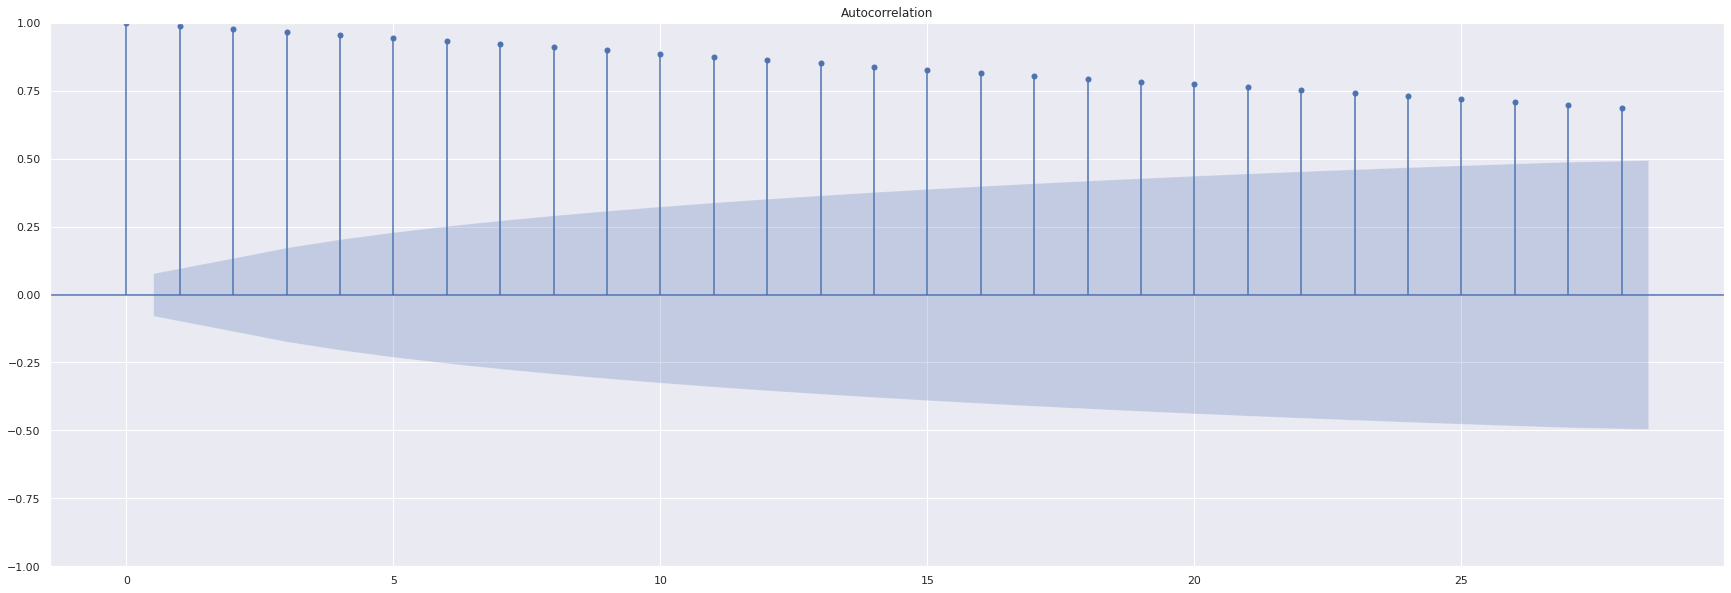

In [16]:
f.plot_acf()
plt.show()

In [17]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


In [25]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-1.3227509760045861
0.6187005141679366


In [20]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

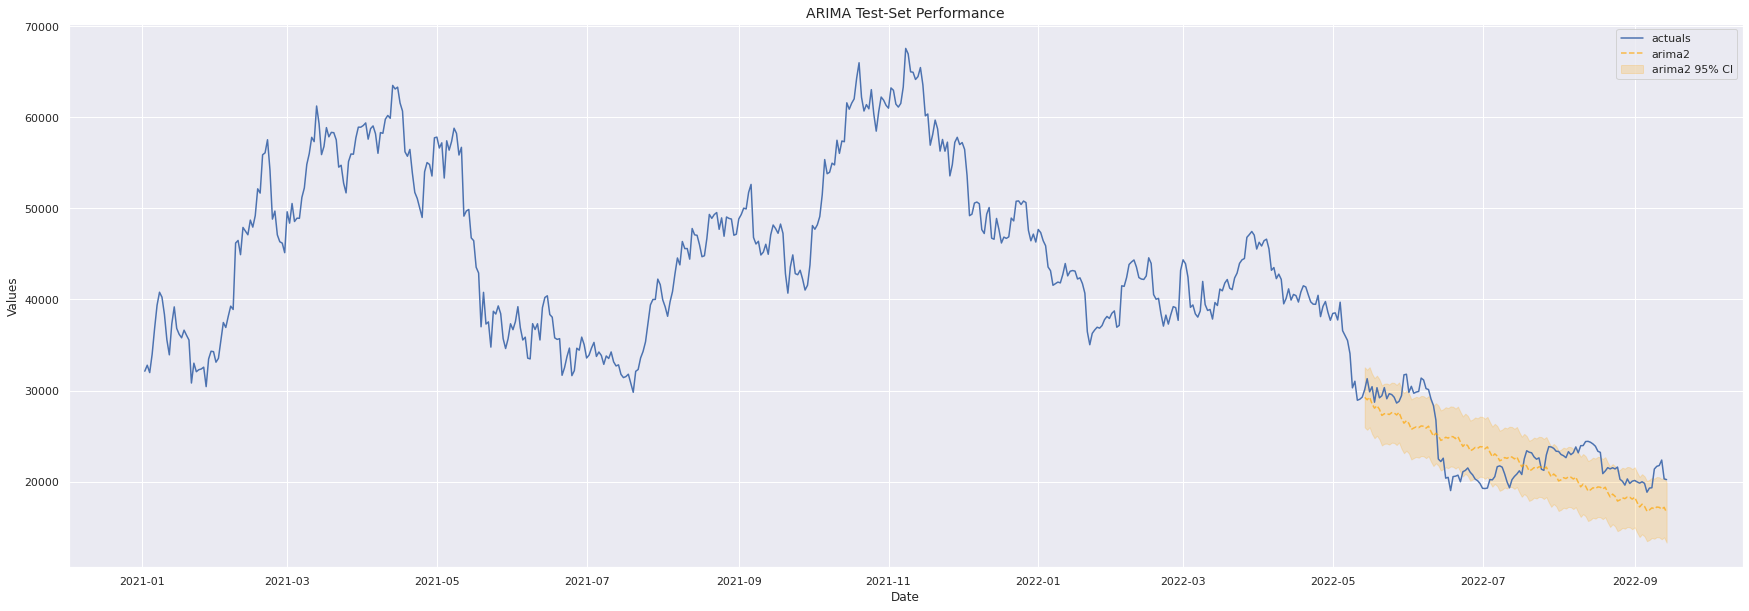

In [21]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

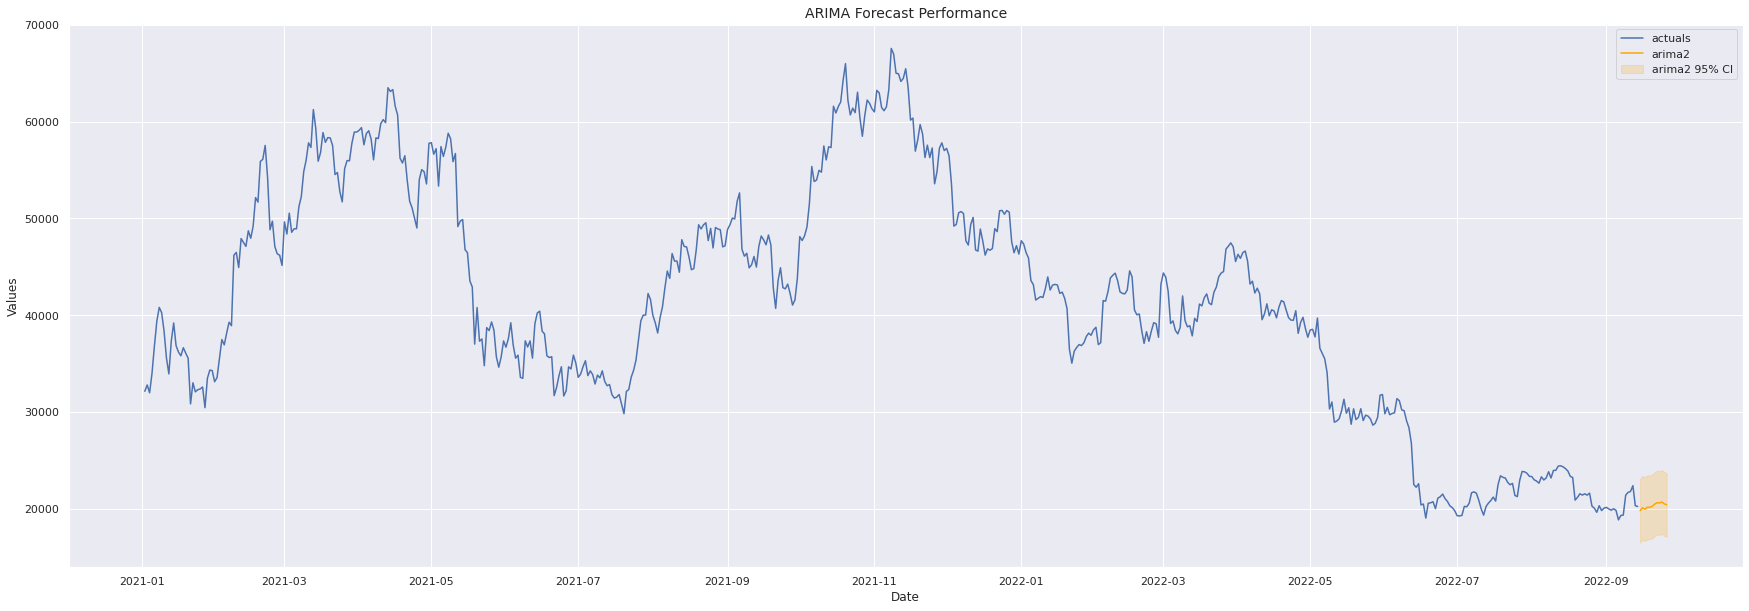

In [22]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [23]:
f.regr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  621
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5434.923
Date:                          Wed, 14 Sep 2022   AIC                          10881.846
Time:                                  16:30:06   BIC                          10908.307
Sample:                                       0   HQIC                         10892.140
                                          - 621                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.590      1.696      0.090      -0.156       2.156
ma.L1         -0.9999      0.229     -4.370      0.000      -1.448      -0.551
ar.S.L12       0.1016      0.036      2.814      0.005       0.031       0.172
ar.S.L24       0.0762      0.026      2.949      0.003       0.026       0.127
ma.S.L12      -0.9978      0.415     -2.406      0.016      -1.811      -0.185
sigma2      4.009e+06    4.4e-07   9.11e+12      0.000    4.01e+06    4.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               298.35
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+28. Standard errors may be unstable.
"""

## Auto ARIMA Approach

In [26]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=8840.181, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8835.313, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8837.784, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8837.926, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8833.319, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8836.057, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8836.203, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8834.549, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8837.045, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8837.043, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8839.037, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.232 seconds


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

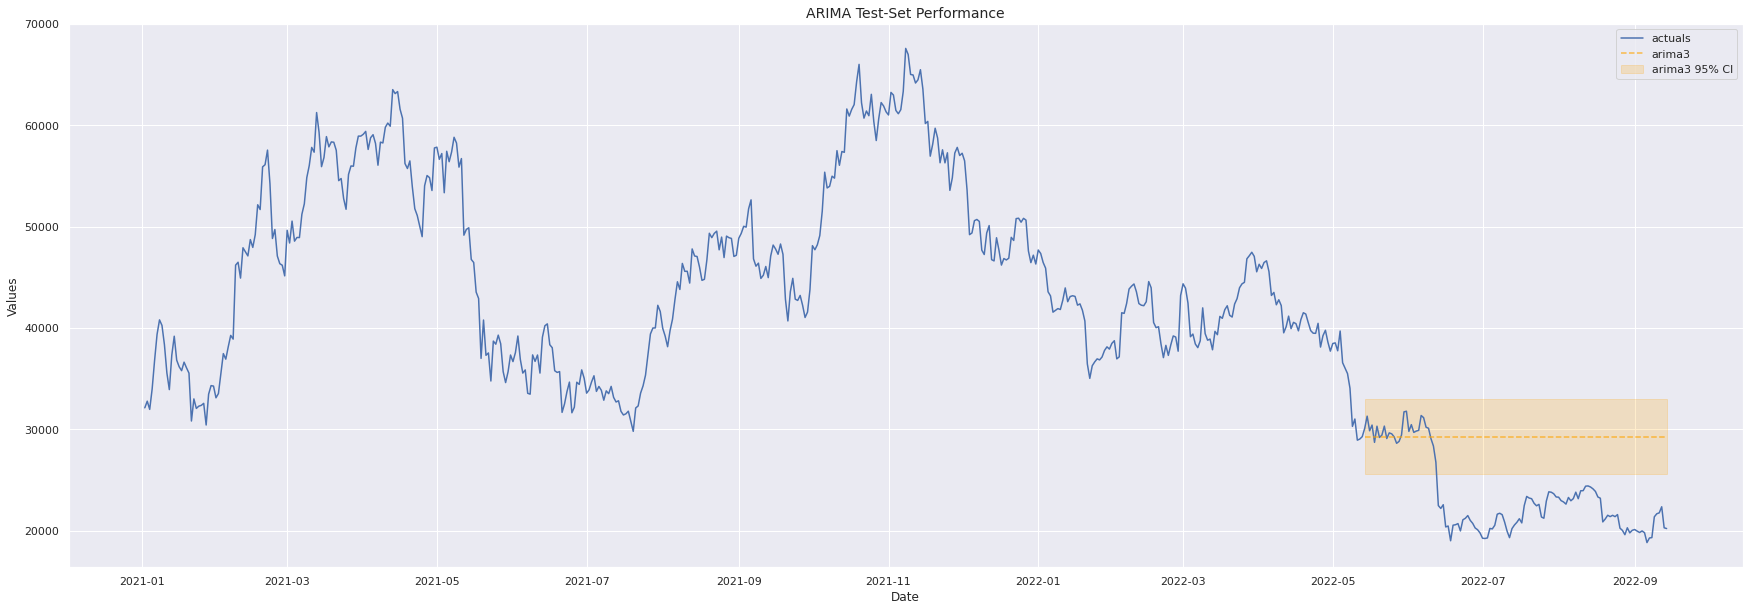

In [29]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

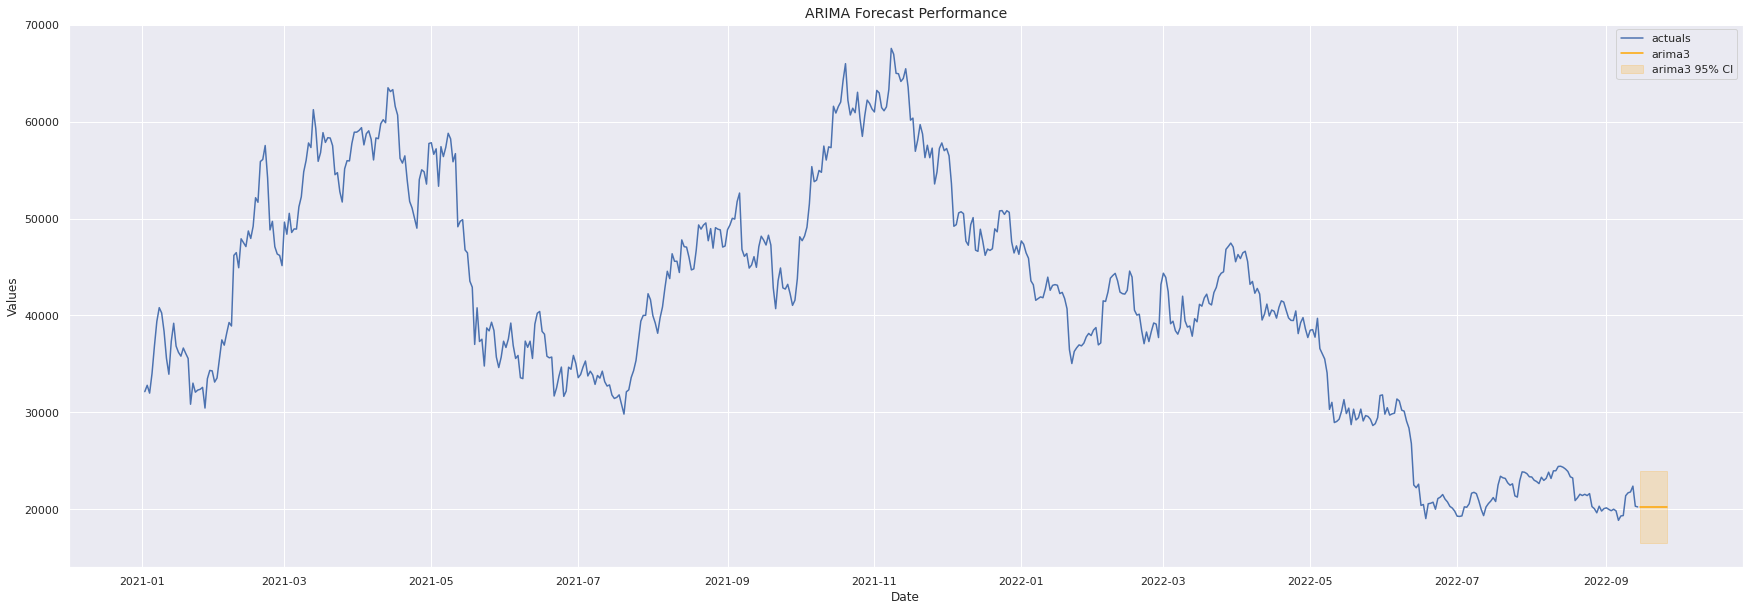

In [28]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [30]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  621
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5469.382
Date:                Wed, 14 Sep 2022   AIC                          10940.764
Time:                        16:32:21   BIC                          10945.193
Sample:                             0   HQIC                         10942.485
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.686e+06   1.05e+05     25.659      0.000    2.48e+06    2.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               129.40
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Grid Search Approach - TODO

## LSTM

In [31]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.32
the p-value is 0.6187
the series is not stationary
----------------------------------------------------------------------------------------------------


### Prepare Forecast for LSTM

In [32]:
f.set_test_length(12)
f.generate_future_dates(12)

#### Attempt 1

In [34]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

2022-09-14 16:36:53.766359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-14 16:36:53.766396: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 16:36:53.766421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rocketstation): /proc/driver/nvidia/version does not exist
2022-09-14 16:36:53.766690: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


19/19 [==============================] - 1s 1ms/step - loss: 0.4627


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'Default Test-set Performance')

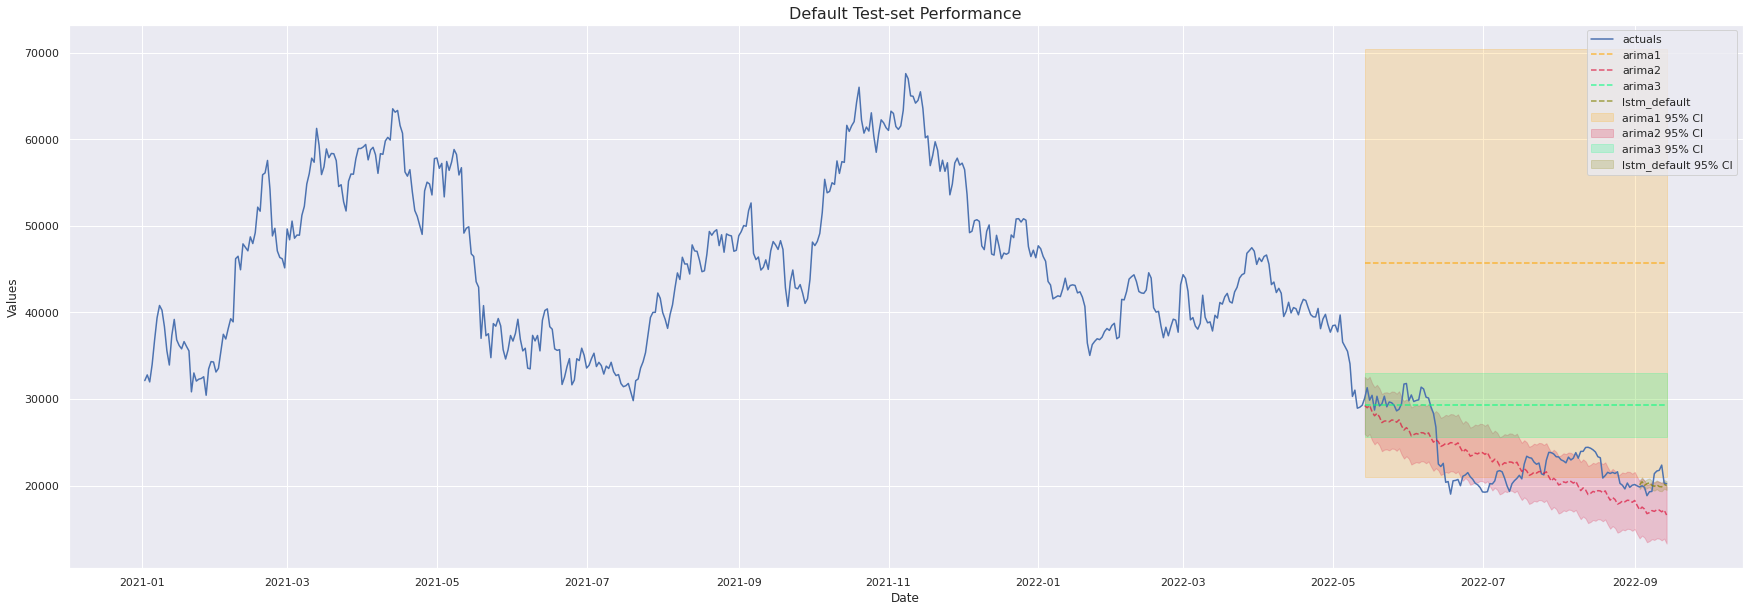

In [35]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

#### Attempt 2

In [36]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

19/19 [==============================] - 1s 9ms/step - loss: 0.4447


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-set Performance')

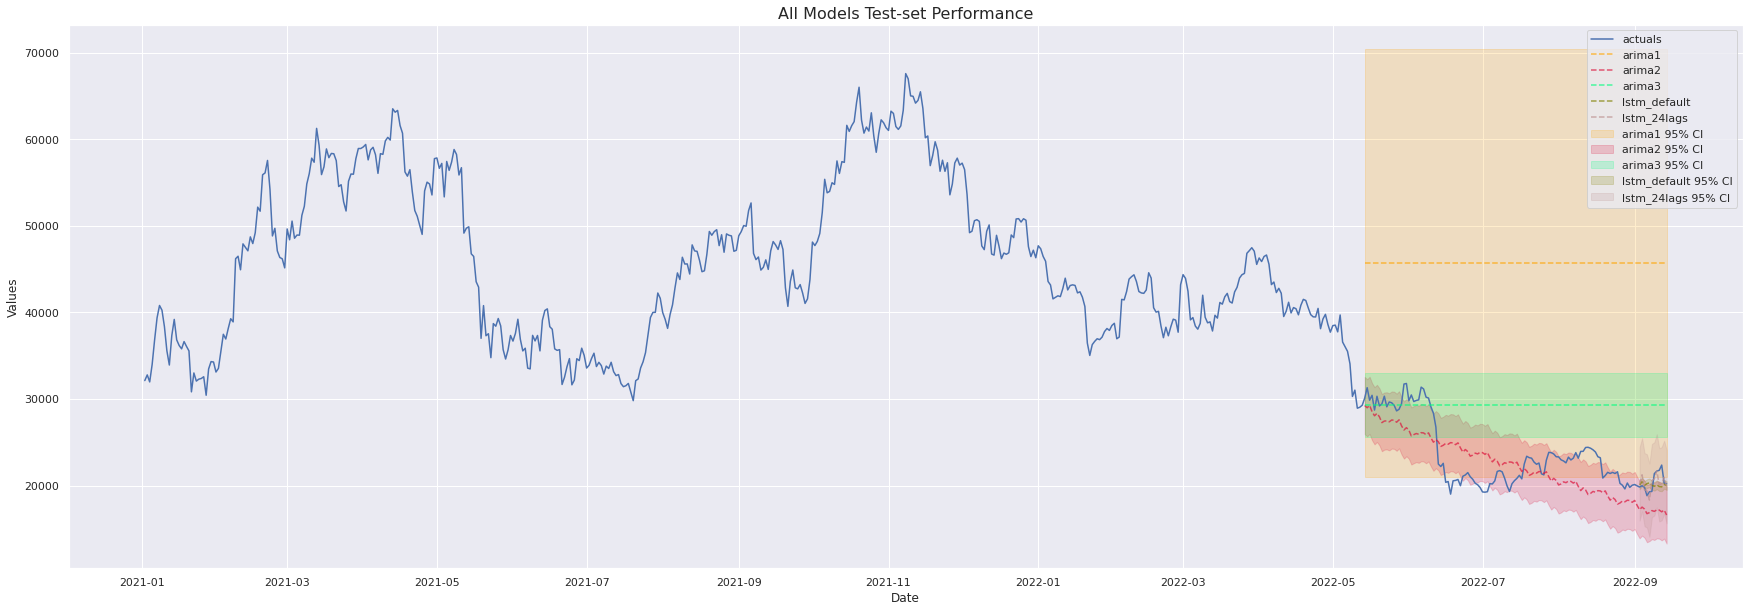

In [37]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

#### Attempt 3

In [38]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)


Epoch 1/5
15/15 [==============================] - 1s 29ms/step - loss: 0.3959 - val_loss: 0.6030
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3480 - val_loss: 0.5355
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2975 - val_loss: 0.4511
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2566 - val_loss: 0.3801
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2206 - val_loss: 0.3310
Epoch 1/5
15/15 [==============================] - 2s 28ms/step - loss: 0.4198 - val_loss: 0.6595
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3913 - val_loss: 0.6222
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3613 - val_loss: 0.5743
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3214 - val_loss: 0.4930
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2588 - val_loss: 0.3772


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-set Performance')

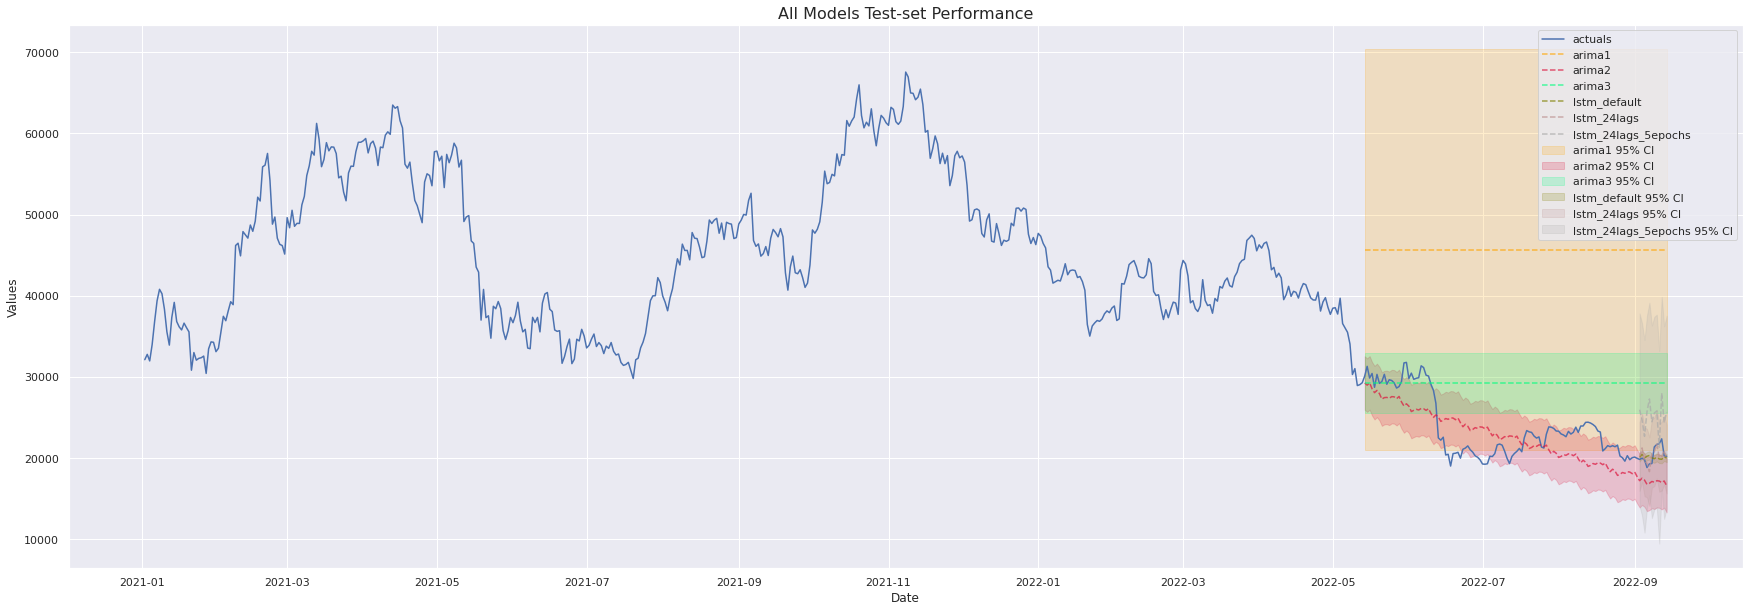

In [39]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

#### Attempt 4

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

Epoch 1/25
15/15 [==============================] - 3s 74ms/step - loss: 0.3636 - val_loss: 0.4685
Epoch 2/25
15/15 [==============================] - 0s 28ms/step - loss: 0.2392 - val_loss: 0.3167
Epoch 3/25
15/15 [==============================] - 0s 26ms/step - loss: 0.1643 - val_loss: 0.2420
Epoch 4/25
15/15 [==============================] - 0s 25ms/step - loss: 0.1248 - val_loss: 0.1791
Epoch 5/25
15/15 [==============================] - 0s 24ms/step - loss: 0.1023 - val_loss: 0.1832
Epoch 6/25
15/15 [==============================] - 0s 25ms/step - loss: 0.0925 - val_loss: 0.1595
Epoch 7/25
15/15 [==============================] - 0s 23ms/step - loss: 0.0882 - val_loss: 0.1539
Epoch 8/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0854 - val_loss: 0.1597
Epoch 9/25
15/15 [==============================] - 0s 23ms/step - loss: 0.0818 - val_loss: 0.1485
Epoch 10/25
15/15 [==============================] - 0s 25ms/step - loss: 0.0799 - val_loss: 0.1514
Epoch 11/

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-Set Performance')

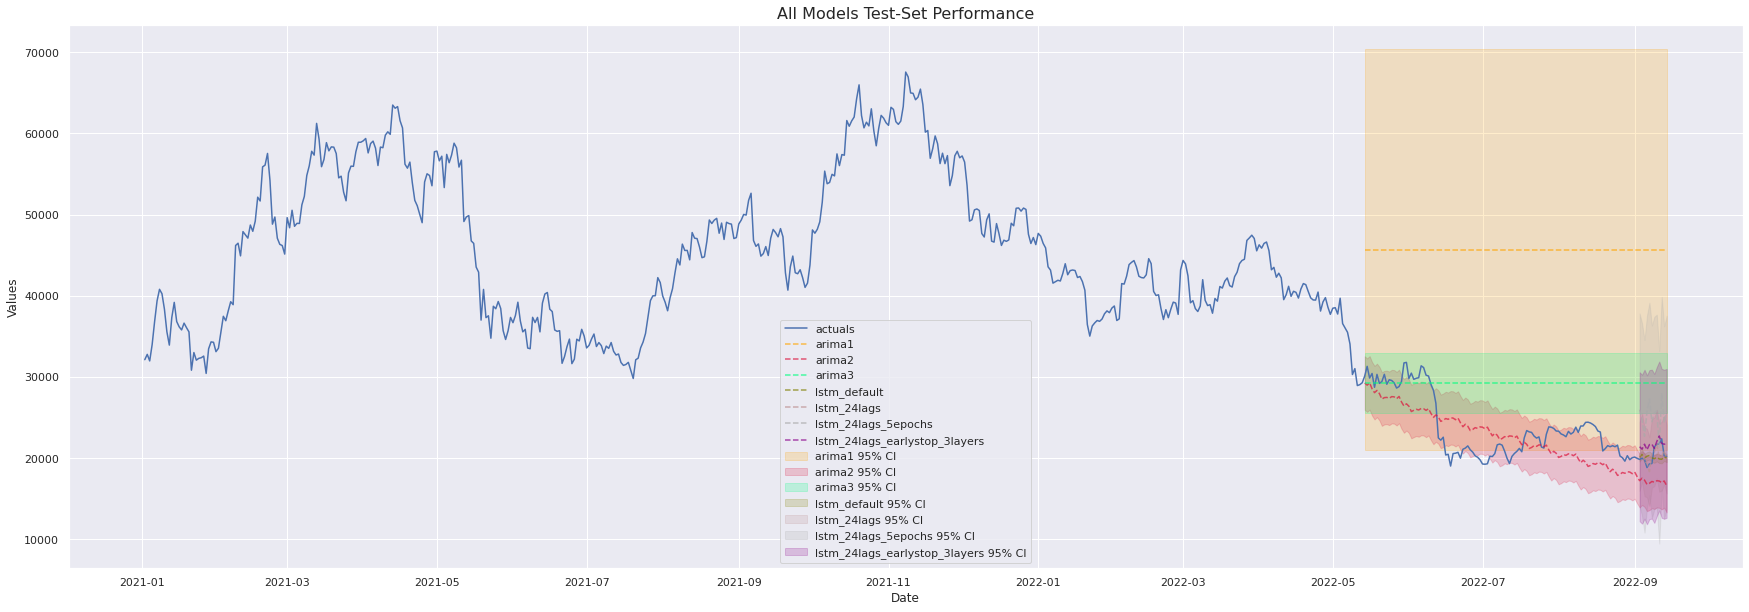

In [41]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

#### Attempt 5

Epoch 1/15
14/14 [==============================] - 5s 117ms/step - loss: 0.2352 - val_loss: 0.2623
Epoch 2/15
14/14 [==============================] - 1s 54ms/step - loss: 0.1301 - val_loss: 0.1627
Epoch 3/15
14/14 [==============================] - 1s 55ms/step - loss: 0.1072 - val_loss: 0.1740
Epoch 4/15
14/14 [==============================] - 1s 54ms/step - loss: 0.1028 - val_loss: 0.1520
Epoch 5/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0942 - val_loss: 0.1652
Epoch 6/15
14/14 [==============================] - 1s 53ms/step - loss: 0.0842 - val_loss: 0.1305
Epoch 7/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0814 - val_loss: 0.1273
Epoch 8/15
14/14 [==============================] - 1s 55ms/step - loss: 0.0830 - val_loss: 0.1283
Epoch 9/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0800 - val_loss: 0.1356
Epoch 10/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0809 - val_loss: 0.1287
Epoch 11

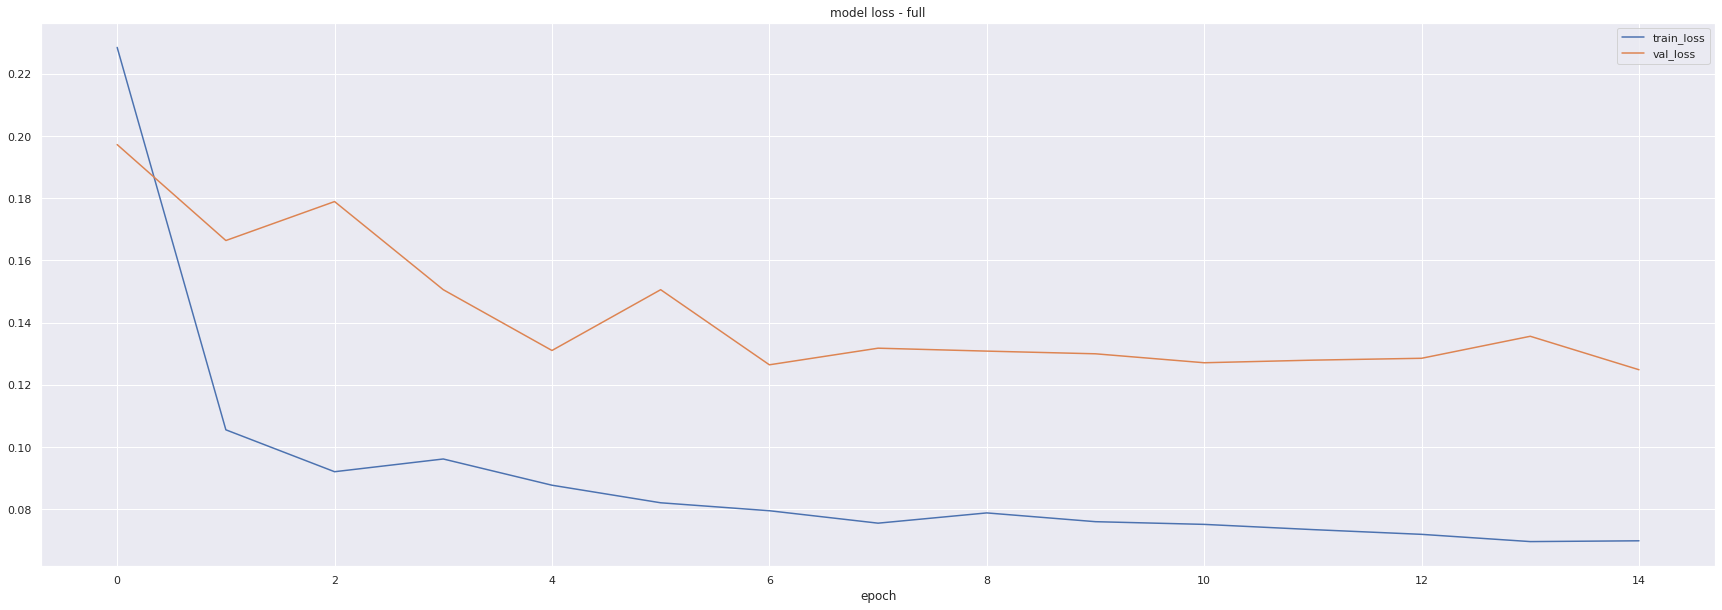

In [42]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, '24 Lags 4 Layers 15 Epochs Test-Set Performance')

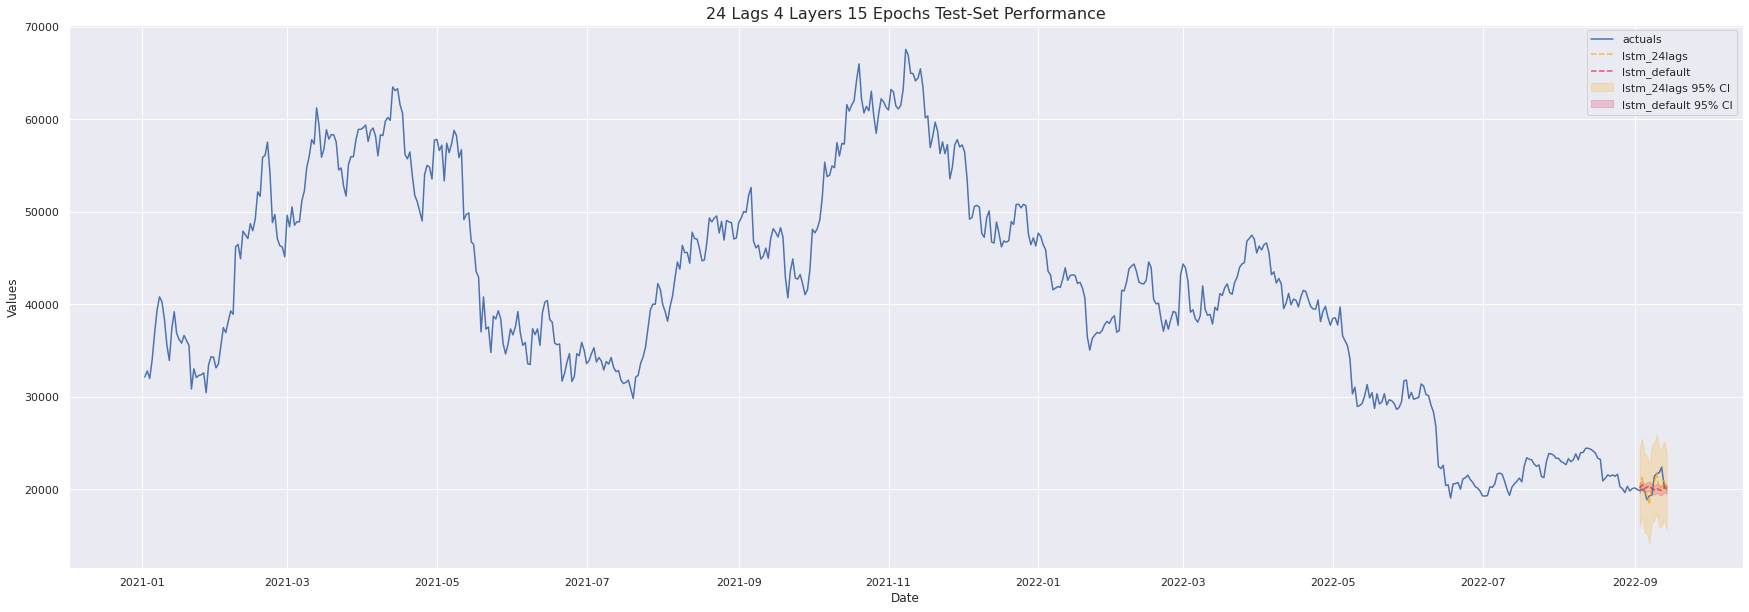

In [43]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

#### Attempt 6

In [ ]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()